# Paired t-tests

Follow examples taken from:
[Paired t-test](http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf) (Mathematics Learning Support Centre).  
>Suppose a sample of n students were given a diagnostic test before studying a particular module and then again after completing the module. We want to find out if, in general, our teaching leads to improvements in students’ knowledge/skills (i.e. test scores). We can use the results from our sample of students to draw conclusions about the impact of this module in general.

## References
Statistics
- Cumming, G., & Finch, S. (2005). Inference by Eye: Confidence Intervals and How to Read Pictures of Data. American Psychologist, 60(2), 170-180. [dx.doi.org link](http://dx.doi.org/10.1037/0003-066X.60.2.170)

Visualization:  
- [How do I align gridlines for two y-axis using matplotlib](https://stackoverflow.com/questions/26752464/how-do-i-align-gridlines-for-two-y-axis-scales-using-matplotlib) (stackoverflow)

# Imports

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

In [2]:
def fatten_boolean_array(idxs):
    return idxs | np.concatenate([[False], idxs[:-1]]) | np.concatenate([idxs[1:], [False]])

# Data
The (synthetic) has been copied into `exam-score.csv` and represents pre-module and post-module scores on a sample of `n=20` students.

In [3]:
# Load pre- and post-module scores from CSV file
path = Path.home()/'Computing'/'statistics'/'exam-scores.csv'
scores = pd.read_csv(path)

# Calculate score differences
scores['difference'] = scores['post-module score'] - scores['pre-module score']

# Basic statistics on score differences

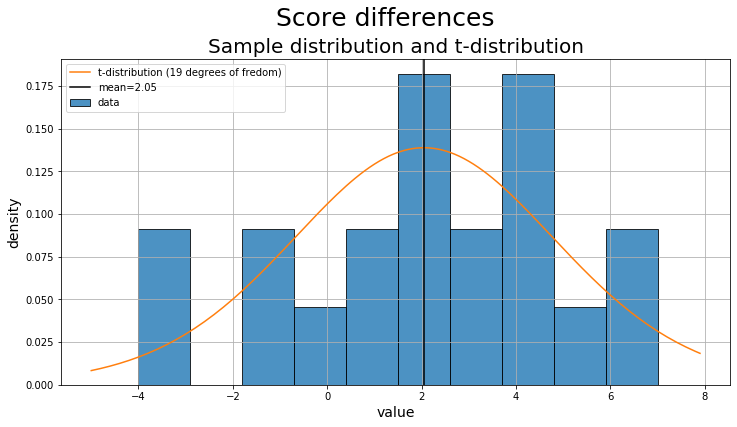

In [4]:
# Parameters
n = scores.shape[0]
ddof = 1
df = n - ddof

# Sample statistics
mu = scores.difference.mean() # sample mean
sigma = scores.difference.std(ddof=ddof) # sample standard deviation
sem = stats.sem(scores.difference) # standard error of the mean

# Model t-distribution
h = .1
t = np.arange(scores.difference.min() - 1, scores.difference.max() + 1, h)
pdf = stats.t.pdf(t, df=df, loc=mu, scale=sigma)

# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(scores.difference, density=True, label='data', alpha=.8, edgecolor='k', linewidth=1);
ax.plot(t, pdf, label=f't-distribution ({df} degrees of fredom)')

ax.axvline(mu, color='k', label=f'mean={mu:.2f}')

ax.set_title("Sample distribution and t-distribution", fontsize=20)
ax.set_ylabel("density", fontsize=14)
ax.set_xlabel("value", fontsize=14)

ax.legend()
ax.grid();

fig.suptitle("Score differences", fontsize=25, y=1);

# The hypothesis alternative
- Null hypothesis (H0): there is no difference in the scores before and after taking the module: $\mu=0$.
- Alternative hypothesis (H1): the scores improve after taking the module: $\mu>0$.

## Remark
I am considering a right-tailed hypothesis, while the reference considers a two-tailed hypothesis.

# The t-statistic under the null hypothesis

In [5]:
t_stat = mu/sem

# The p-value for the t-statistic

In [6]:
p_value = stats.t.sf(t_stat, df=df)
print(f"p-value: {p_value:.6f}")

p-value: 0.002197


The p-value gives strong evidence that, on average, taking the module improves test scores.

# The t-statistic against the t-distribution

Under the null hypothesis, the t-statistic follows the t-distribution with `df` degrees of freedom:

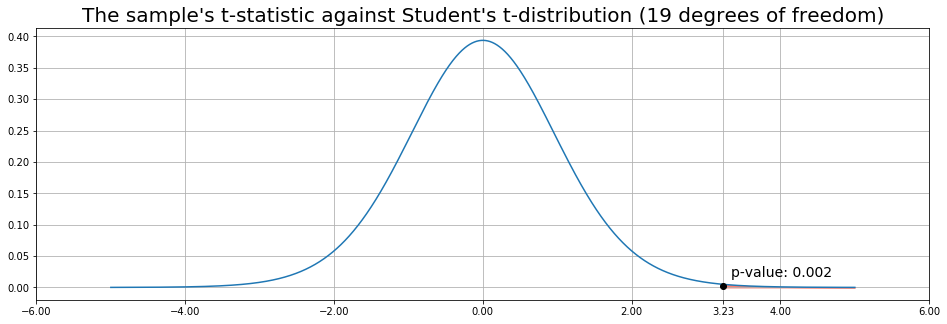

In [7]:
# Parameters
h = .002
tmax = 5
tmin = -tmax

# Model PDF
t = np.arange(tmin, tmax+h, h)
y = stats.t.pdf(t,df=n-1)

# Tail bounded by sample t-statistic
tmore = np.arange(t_stat, tmax+h, h)
ymore = stats.t.pdf(tmore, df=n-1)

# Visualization
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(t, y)
ax.fill_between(tmore, 0, ymore, color='salmon')

ax.set_title(f"The sample's t-statistic against Student's t-distribution ({df} degrees of freedom)", fontsize=20)

ax.plot(t_stat, p_value, 'o', color='k')
ax.text(t_stat+.1, p_value+.01, f'p-value: {p_value:.3f}', fontsize=14, horizontalalignment='left', verticalalignment='bottom')

ax.set_xticks(np.append(ax.get_xticks(), t_stat))

ax.grid();

# Confidence interval
# Set the confidence level

In [8]:
alpha = .95

# Calculate the critical value for the t-statistic

In [9]:
t_crit = stats.t.isf((1 - alpha)/2, df=df)
t_crit

2.093024054408263

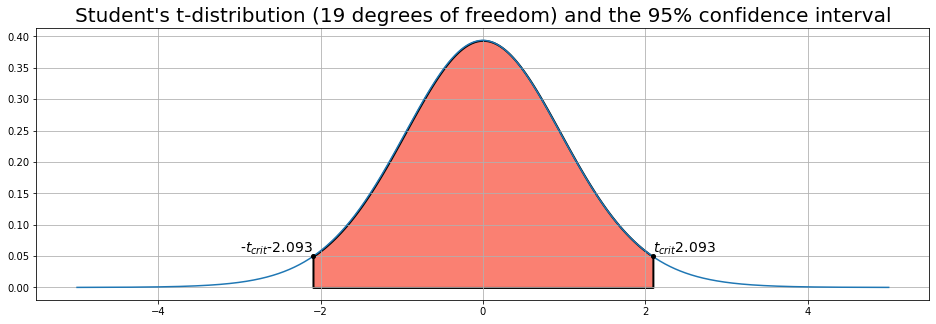

In [10]:
h = .002
tmax = 5
tmin = -tmax

t = np.arange(tmin, tmax+h, h)
y = stats.t.pdf(t,df=n-1)

tci = np.arange(-t_crit, t_crit+h, h)
yci = stats.t.pdf(tci, df=df)

# Visualization
fig, ax = plt.subplots(figsize=(16, 5))

ax.plot(t, y)
ax.fill_between(tci, 0, yci, facecolor='salmon', edgecolor='k', linewidth=2)

ax.set_title(f"Student's t-distribution ({df} degrees of freedom) and the {alpha:.0%} confidence interval", fontsize=20)

pdf_crit = stats.t.pdf(t_crit, df=df)
ax.plot(-t_crit, pdf_crit, 'ko', markersize=4)
ax.text(-t_crit, pdf_crit, '-$t_{crit}$'+f'{-t_crit:.3f}', horizontalalignment='right', verticalalignment='bottom', fontsize=14)
ax.plot(t_crit, pdf_crit, 'ko', markersize=4)
ax.text(t_crit, pdf_crit, '$t_{crit}$'+f'{t_crit:.3f}', horizontalalignment='left', verticalalignment='bottom', fontsize=14)

ax.grid();

In [11]:
alpha = .95
t_star = stats.t.isf((1 - alpha)/2, df=df)

# Confidence level vs critical value
Here we investigate the effect of the confidence level on the critical value for the t-statistic:

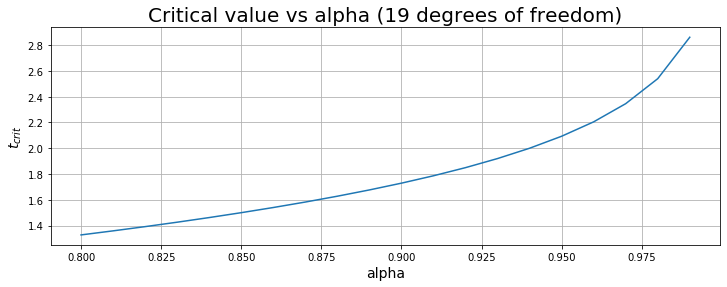

In [12]:
alphas = np.arange(.8, 1, .01)
tcrits = [stats.t.isf((1 - a)/2, df=df) for a in alphas]

fig, ax = plt.subplots(figsize=(12, 4))
alphas = np.arange(.8, 1, .01)
tcrits = [stats.t.isf((1 - a)/2, df=df) for a in alphas]
ax.plot(alphas, tcrits)
ax.set_xlabel('alpha', fontsize=14)
ax.set_ylabel('$t_{crit}$ ', fontsize=14)

ax.set_title(f"Critical value vs alpha ({df} degrees of freedom)", fontsize=20)
ax.grid()

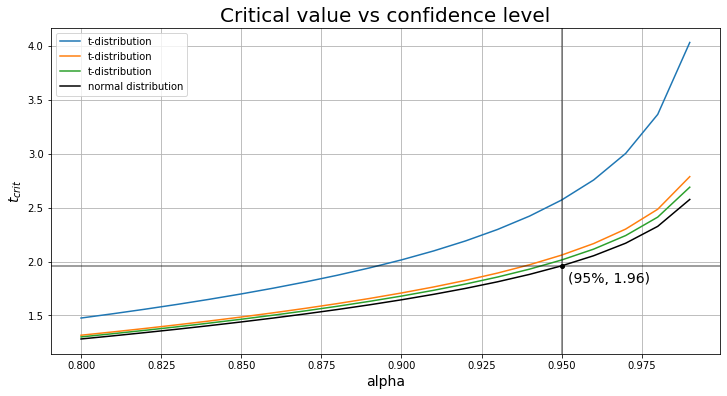

In [13]:
alphas = np.arange(.8, 1, .01)
dfs = range(5, 60, 20)

tcrits = np.array([[stats.t.isf((1 - a)/2, df=df) for a in alphas] for df in dfs]).T
tcrit_norm = np.array([stats.norm.isf((1 - a)/2) for a in alphas])

# Visulation
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(alphas, tcrits, label='t-distribution');
ax.plot(alphas, tcrit_norm, color='k', label='normal distribution')
ax.set_xlabel('alpha', fontsize=14)
ax.set_ylabel('$t_{crit}$ ', fontsize=14)

alpha0 = .95
t_star0 = stats.norm.isf(.025)
ax.plot(alpha0, t_star0, 'ko', markersize=4)
ax.text(alpha0 + 0.002, t_star0 - 0.05, f"({alpha0:.0%}, {t_star0:.2f})", horizontalalignment='left', verticalalignment='top', fontsize=14)
ax.axvline(alpha0, color='k', alpha=.5)
ax.axhline(t_star0, color='k', alpha=.5)


ax.set_title(f"Critical value vs confidence level", fontsize=20)
ax.legend()
ax.grid()

# Calculate the confidence interval

In [14]:
alpha = .95
t_crit = stats.t.isf((1 - alpha)/2, df=df)
margin = t_crit*sem
ci = mu - margin, mu + margin

# Different error bars
## Error bars on the differences in the scores

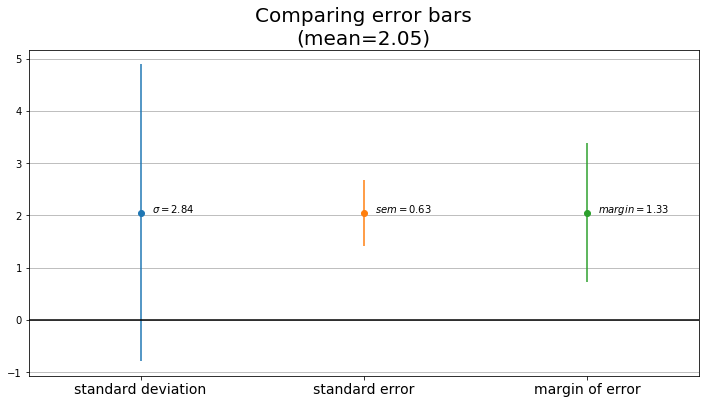

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.errorbar(0, mu, sigma, fmt='o')
ax.text(0.05, mu, f'$\sigma={sigma:.2f}$')
ax.errorbar(1, mu, sem, fmt='o')
ax.text(1.05, mu, f'$sem={sem:.2f}$')
ax.errorbar(2, mu, margin, fmt='o')
ax.text(2.05, mu, f'$margin={margin:.2f}$')

ax.set_xticks(range(3))
ax.set_xticklabels(['standard deviation', 'standard error', 'margin of error'], fontsize=14)
ax.set_xlim(-.5, 2.5)

ax.axhline(0, color='k')

ax.set_title(f"Comparing error bars\n(mean={mu})", fontsize=20)

ax.grid(axis='y');

# Error bars with confidence intervals
We now show confidence interval error bars for both pre-module and post-module test scores, together with the confidence interval on the difference.

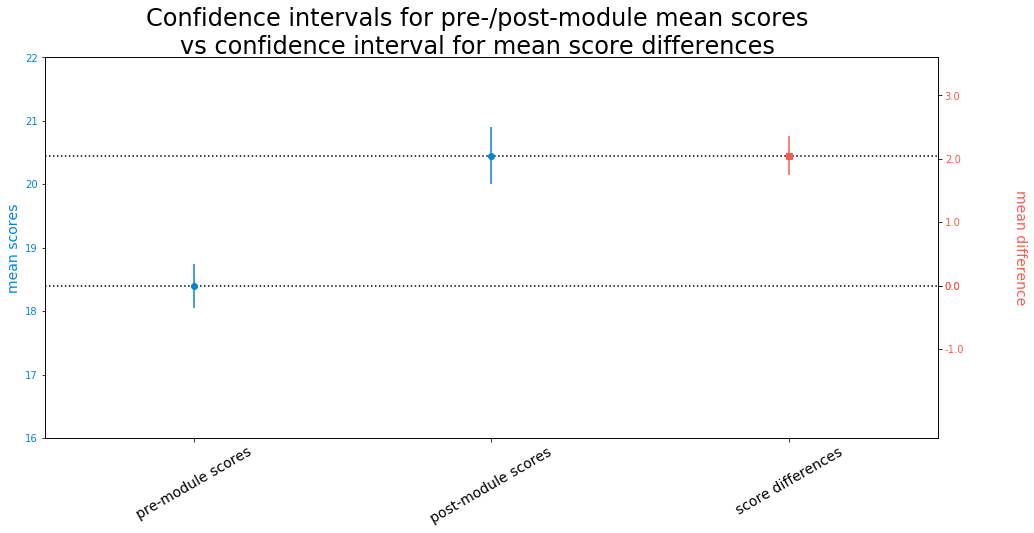

In [16]:
mu_all = scores.mean()
sigma_all = scores.std()
sem_all = stats.sem(scores)

mu_diff = mu_all[1] - mu_all[0]

alpha = .95
n = len(scores)
df = n - 1
t_star = stats.t.sf((1 - alpha)/2, df=df)

margin_all = t_star*sem_all

# Visualization
# Parameters
color_indiv = 'xkcd:cerulean'
color_diff = 'xkcd:coral'

fig, ax = plt.subplots(figsize=(16, 7))

# Pre- and post-module scores
ax.errorbar(range(2), mu_all[:2], margin_all[:2], fmt='o', color=color_indiv)

ax.set_ylim(mu_all[:2].min() - 2, mu_all[:2].max() + 1)
ax.set_yticks(ax.get_yticks())

ax.set_xticks(range(3))
ax.set_xlim(-.5, 2.5)

ax.set_xticks(range(3))
ax.set_xlim(-.5, 2.5)

ax.axhline(mu_all[0], linestyle=':', color='k')
ax.axhline(mu_all[1], linestyle=':', color='k')

ax.set_xticklabels(['pre-module scores', 'post-module scores', 'score differences'], fontsize=14, rotation=30)

# ax.set_title("For: pre- and post-module mean scores, and score differences", fontsize=20)
ax.set_ylabel('mean scores', fontsize=14, color=color_indiv)

ax.tick_params(axis='y', labelcolor=color_indiv)

# Score differences
ax_twin = ax.twinx()
ax_twin.errorbar(2, mu_all[1], margin_all[-1], fmt='s', color=color_diff)

max_margins = margin_all.max()
new_ticks = np.hstack([
    np.arange(0, -2*np.ceil(max_margins), -1),
    np.arange(0, mu_all[1] + 2*np.ceil(max_margins), 1)
])
ax_twin.set_yticks([mu_all[0]+ i for i in new_ticks])
ax_twin.set_yticklabels([i for i in new_ticks])


ax_twin.set_ylim(ax.get_yticks()[0], ax.get_yticks()[-1])

ax_twin.set_ylabel('mean difference', fontsize=14, color=color_diff, rotation=-90)
ax_twin.tick_params(axis='y', labelcolor=color_diff)
ax_twin.yaxis.set_label_coords(1.1, .5)

ax.grid(False);

fig.suptitle("Confidence intervals for pre-/post-module mean scores\nvs confidence interval for mean score differences", fontsize=24);

# Probability that taking the module improves scores?

**Warning.**  The above formulation is difficult to makes sense of.

Given a sample, calculate the largest critical value such that the confidence interval entirely lies on the region of positive values, and find the corresponding alpha.

In [17]:
t_max = mu/sem
alpha_max = 1 - (stats.t.cdf(-t_max, df=df) + stats.t.sf(t_max, df=df))
t_max, alpha_max

(3.2312526655803127, 0.9956050340068143)

# Interpretation
**Warning.**  It is anything but clear whether the statement can have a mathematically sound formulation.  

> This particular sample has a `99.5%`
 chance of demonstrating that taking the module improves test scores.
 
 **Better.**  Instead, I think what I am after is simply the p-value for the (one-sided) hypothesis test:

In [18]:
p_value = stats.t.sf(mu/sem, df=df)
p_value

0.002197482996592832

# Interpretation (revised)

> The null hypothesis (that taking the course does *not* improve test scores) can be rejected with a p-value of `.0022`.